<a href="https://colab.research.google.com/github/cemileturkel/Wheat_Seeds_Dataset-SVM/blob/main/Wheat_Seeds_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Load to Dataset
df = pd.read_csv('/content/Wheat_Seeds_Dataset.csv')

# Display the first few rows
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# select disctinct Class from Wheat_Seeds_Dataset

df['Class'].unique()

array([1, 2, 3])

In [ ]:
# select count(Class)

df['Class'].value_counts()


,count
Class,
2,69
1,67
3,67


In [ ]:
# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(      Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
 198  12.19      13.20       0.8783             5.137            2.981   
 93   19.31      16.59       0.8815             6.341            3.810   
 38   13.54      13.85       0.8871             5.348            3.156   
 24   16.19      15.16       0.8849             5.833            3.421   
 96   18.72      16.34       0.8810             6.219            3.684   
 
      Asymmetry coefficient  Length of kernel groove  
 198                  3.631                    4.870  
 93                   3.477                    6.238  
 38                   2.587                    5.178  
 24                   0.903                    5.307  
 96                   2.188                    6.097  ,
 198    3
 93     2
 38     1
 24     1
 96     2
 Name: Class, dtype: int64)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.91538993, -1.04228531,  0.33255934, -1.11590269, -0.73414768,
         0.01910947, -1.07732134],
       [ 1.5263273 ,  1.54122366,  0.47264121,  1.57341548,  1.46903358,
        -0.0853982 ,  1.67949874],
       [-0.45242389, -0.54692224,  0.71778449, -0.64460191, -0.26906116,
        -0.68937109, -0.45663378],
       [ 0.45636132,  0.45142489,  0.6214782 ,  0.43871978,  0.4352127 ,
        -1.83216924, -0.19667048],
       [ 1.32399399,  1.3506994 ,  0.45075342,  1.30090982,  1.13417129,
        -0.96014096,  1.39535281]])

In [ ]:
# Fit and transform the training data
X_tum = scaler.fit_transform(X)


# Initialize the SVM model
svm_model2 = SVC(kernel='linear', random_state=42)

# Train the model
svm_model2.fit(X_tum, y)

# Make predictions
y_pred = svm_model2.predict(X_tum)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y, y_pred))

Accuracy: 96.55%
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        67
           2       0.99      0.99      0.99        69
           3       0.94      0.99      0.96        67

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 95.12%
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        16
           3       0.88      1.00      0.94        15

    accuracy                           0.95        41
   macro avg       0.96      0.93      0.94        41
weighted avg       0.96      0.95      0.95        41



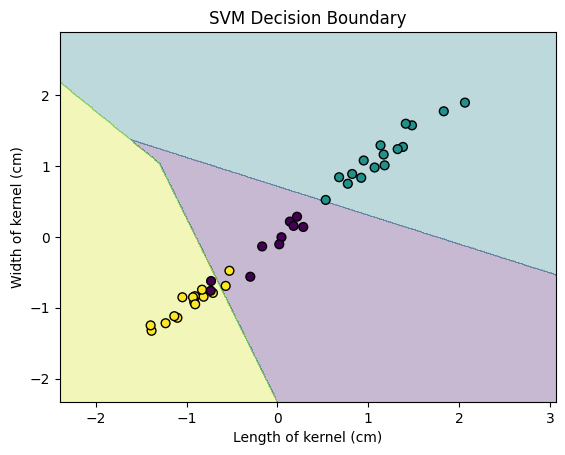

In [ ]:
# Use only the first two features for visualization
X_vis = df.iloc[:, [0, 1]].values
y_vis = df['Class'].values

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

# Split the data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Standardize the features
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

# Train the SVM model
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel('Length of kernel (cm)')
    plt.ylabel('Width of kernel (cm)')
    plt.title('SVM Decision Boundary')
    plt.show()

# Visualize
plot_decision_boundaries(X_test_vis, y_test_vis, svm_model_vis)

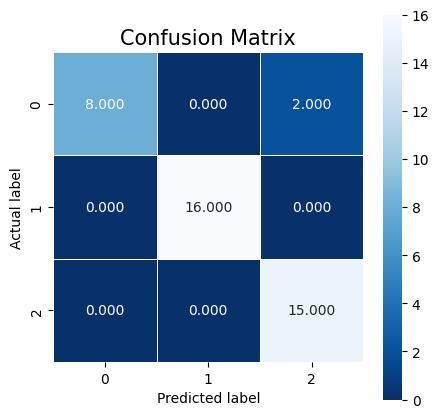

In [ ]:
# draw confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.show()